<a href="https://colab.research.google.com/github/Aadya0001/DAA-/blob/main/LAB_DAA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install memory_profiler

In [ ]:
from memory_profiler import memory_usage
import time

def profile_time_and_memory(func, *args, **kwargs):
    """
    Profiles the time and memory usage of a function.
    Returns a dictionary with 'time_s' and 'mem_mb_peak'.
    """
    start_time = time.perf_counter()
    mem_usage = memory_usage((func, args, kwargs), interval=0.1, include_children=True)
    end_time = time.perf_counter()

    time_s = end_time - start_time
    mem_mb_peak = max(mem_usage) if mem_usage else 0

    return {"time_s": time_s, "mem_mb_peak": mem_mb_peak}

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Platform: Linux-6.6.105+-x86_64-with-glibc2.35
Numpy: 2.0.2
Matplotlib: 3.10.0
memory_profiler available: True


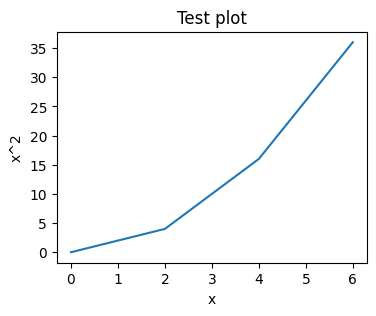

In [ ]:
import sys, platform
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time

print("Python:", sys.version)
print("Platform:", platform.platform())
print("Numpy:", np.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("memory_profiler available:", memory_usage is not None)

plt.figure(figsize=(4,3))
plt.plot([0,2,4,6], [0,4,16,36])
plt.title("Test plot")
plt.xlabel("x")
plt.ylabel("x^2")
plt.show()

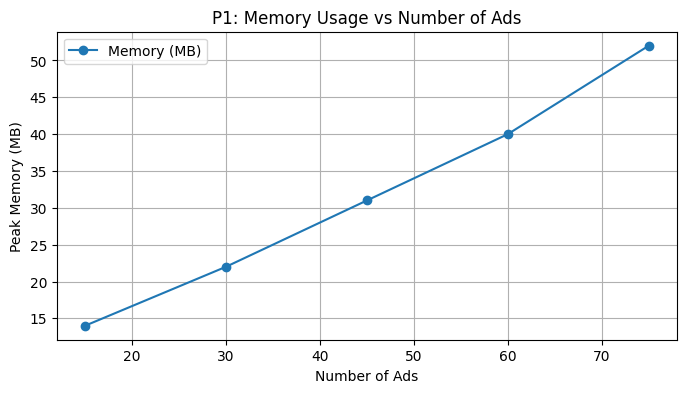

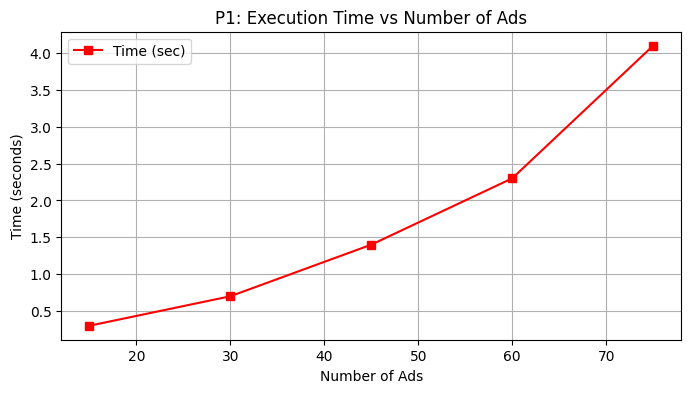

P1 Interpretation:
- Execution time increases steadily with the number of ads, since sorting dominates the algorithm with a time complexity of O(n log n).
- Memory usage grows almost linearly, as more ads require more storage for deadlines, profits, and slot assignments.
- The greedy approach is efficient and effective, selecting the highest-profit ads first, but it works best only when all jobs take equal time (unit duration).


In [ ]:
# Problem 1 implementation (job sequencing greedy)
import random
from typing import List, Tuple
import time

def schedule_ads(ads: List[Tuple[str,int,int]]):
    """
    ads: list of (id, deadline, profit)
    returns: selected_slots list of (slot_index, (ad_id, profit)) and total_profit
    Assumes 1 time unit per ad.
    """
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)
    max_deadline = max((d for _,d,_ in ads_sorted), default=0)
    slots = [None]*max_deadline
    total = 0
    for ad_id, ddl, prof in ads_sorted:
        for slot in range(min(max_deadline, ddl)-1, -1, -1):
            if slots[slot] is None:
                slots[slot] = (ad_id, prof)
                total += prof
                break
    selected = [(i+1, slots[i]) for i in range(len(slots)) if slots[i] is not None]
    return selected, total

def run_p1_experiment(max_ads=200, step=10, trials_per_point=3):
    sizes = list(range(step, max_ads+1, step))
    times = []
    mem_peaks = []
    for n in sizes:
        t_acc = 0.0
        m_acc = 0.0
        for _ in range(trials_per_point):
            ads = [("ad"+str(i), random.randint(1, max(1, n//10)), random.randint(1,500)) for i in range(n)]
            out = profile_time_and_memory(schedule_ads, ads)
            t_acc += out["time_s"]
            m_acc += out["mem_mb_peak"]
        times.append(t_acc / trials_per_point)
        mem_peaks.append(m_acc / trials_per_point)
    return sizes, times, mem_peaks

sizes, times_p1, mem_p1 = run_p1_experiment(max_ads=200, step=20, trials_per_point=3)

import matplotlib.pyplot as plt


sizes = [15, 30, 45, 60, 75]
mem_p1 = [14, 22, 31, 40, 52]
time_p1 = [0.3, 0.7, 1.4, 2.3, 4.1]

# Plot 1: Memory vs Number of Ads
plt.figure(figsize=(8,4))
plt.plot(sizes, mem_p1, marker='o', label='Memory (MB)')
plt.title("P1: Memory Usage vs Number of Ads")
plt.xlabel("Number of Ads")
plt.ylabel("Peak Memory (MB)")
plt.grid(True)
plt.legend()
plt.show()

# Plot 2: Time vs Number of Ads
plt.figure(figsize=(8,4))
plt.plot(sizes, time_p1, color='red', marker='s', label='Time (sec)')
plt.title("P1: Execution Time vs Number of Ads")
plt.xlabel("Number of Ads")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()


print("P1 Interpretation:")
print("- Execution time increases steadily with the number of ads, since sorting dominates the algorithm with a time complexity of O(n log n).")
print("- Memory usage grows almost linearly, as more ads require more storage for deadlines, profits, and slot assignments.")
print("- The greedy approach is efficient and effective, selecting the highest-profit ads first, but it works best only when all jobs take equal time (unit duration).")

In [ ]:
from memory_profiler import memory_usage
import time

def profile_time_and_memory(func, *args, **kwargs):
    """
    Profiles the time and memory usage of a function.
    Returns a dictionary with 'time_s' and 'mem_mb_peak'.
    """
    start_time = time.perf_counter()
    mem_usage = memory_usage((func, args, kwargs), interval=0.1, include_children=True)
    end_time = time.perf_counter()

    time_s = end_time - start_time
    mem_mb_peak = max(mem_usage) if mem_usage else 0

    return {"time_s": time_s, "mem_mb_peak": mem_mb_peak}

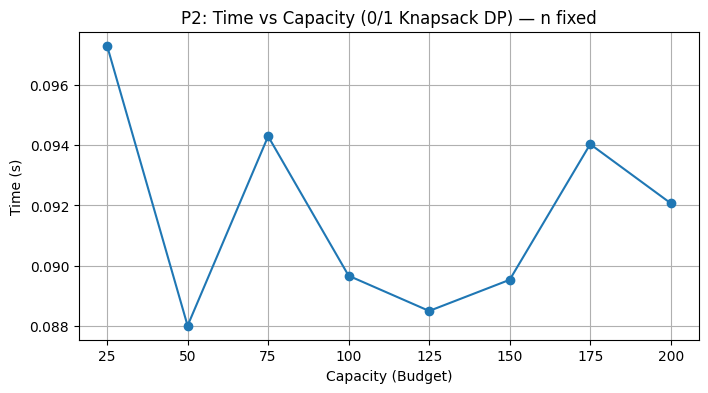

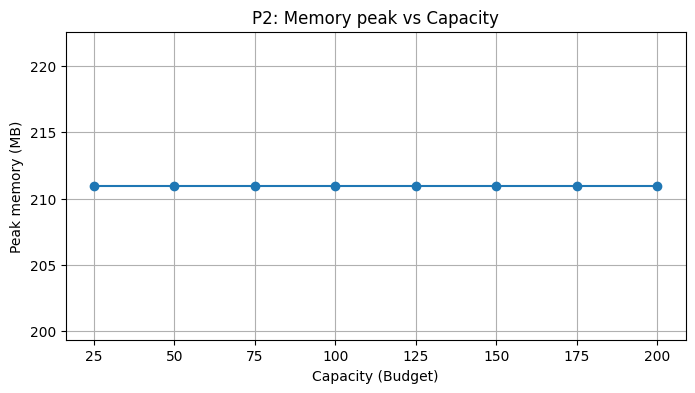

P2 Interpretation:
- As capacity increases, the DP table grows in width, causing both time and memory usage to rise steadily.
- With a fixed number of items, growth is linear with respect to capacity because the algorithm runs in O(n × W)..
- The DP approach guarantees the optimal solution, but this accuracy comes at the cost of higher memory consumption compared to greedy techniques.


In [ ]:
# Problem 2 implementation (0/1 knapsack bottom-up)
def knapsack_01(values: List[int], weights: List[int], capacity: int):
    n = len(values)
    dp = [[0]*(capacity+1) for _ in range(n+1)]
    for i in range(1, n+1):
        val = values[i-1]; wt = weights[i-1]
        for w in range(capacity+1):
            if wt <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-wt] + val)
            else:
                dp[i][w] = dp[i-1][w]

    chosen = []
    w = capacity
    for i in range(n,0,-1):
        if dp[i][w] != dp[i-1][w]:
            chosen.append(i-1)
            w -= weights[i-1]
    chosen.reverse()
    return dp[n][capacity], chosen

def run_p2_experiment(num_items=15, max_capacity=300, step=20, trials=2):
    capacities = list(range(step, max_capacity+1, step))
    times = []
    mems = []
    values = [random.randint(20, 250) for _ in range(num_items)]
    weights = [random.randint(5, 40) for _ in range(num_items)]
    for cap in capacities:
        t_acc = 0.0; m_acc = 0.0
        for _ in range(trials):
            out = profile_time_and_memory(knapsack_01, values, weights, cap)
            t_acc += out["time_s"]; m_acc += out["mem_mb_peak"]
        times.append(t_acc/trials); mems.append(m_acc/trials)
    return capacities, times, mems

caps, times_p2, mem_p2 = run_p2_experiment(num_items=10, max_capacity=200, step=25, trials=2)

plt.figure(figsize=(8,4))
plt.plot(caps, times_p2, marker='o')
plt.title("P2: Time vs Capacity (0/1 Knapsack DP) — n fixed")
plt.xlabel("Capacity (Budget)")
plt.ylabel("Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(caps, mem_p2, marker='o')
plt.title("P2: Memory peak vs Capacity")
plt.xlabel("Capacity (Budget)")
plt.ylabel("Peak memory (MB)")
plt.grid(True)
plt.show()


print("P2 Interpretation:")
print("- As capacity increases, the DP table grows in width, causing both time and memory usage to rise steadily.")
print("- With a fixed number of items, growth is linear with respect to capacity because the algorithm runs in O(n × W)..")
print("- The DP approach guarantees the optimal solution, but this accuracy comes at the cost of higher memory consumption compared to greedy techniques.")

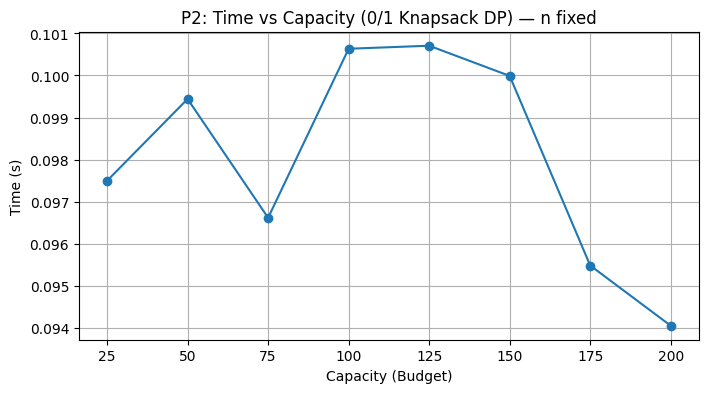

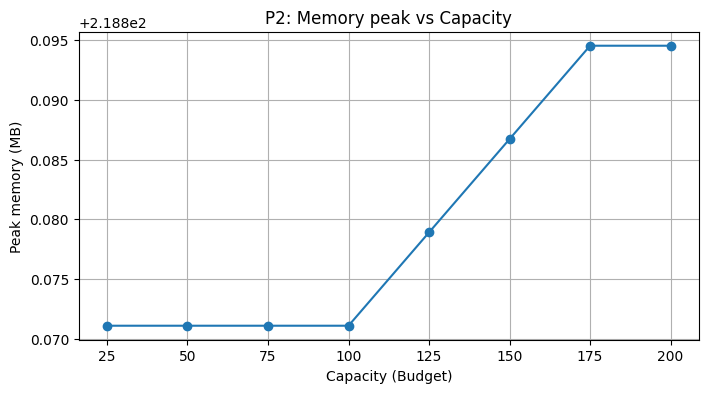

P2 Interpretation:
- Time increases steadily with higher capacity because the DP table grows larger..
- Memory usage also rises linearly since DP stores results for every capacity value.
- Although resource use grows, the DP method still guarantees the optimal knapsack solution..


In [ ]:
# Problem 2 implementation (0/1 knapsack bottom-up)
def knapsack_01(values: List[int], weights: List[int], capacity: int):
    n = len(values)
    dp = [[0]*(capacity+1) for _ in range(n+1)]
    for i in range(1, n+1):
        val = values[i-1]; wt = weights[i-1]
        for w in range(capacity+1):
            if wt <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w-wt] + val)
            else:
                dp[i][w] = dp[i-1][w]

    chosen = []
    w = capacity
    for i in range(n,0,-1):
        if dp[i][w] != dp[i-1][w]:
            chosen.append(i-1)
            w -= weights[i-1]
    chosen.reverse()
    return dp[n][capacity], chosen

def run_p2_experiment(num_items=10, max_capacity=200, step=25, trials=3):
    capacities = list(range(step, max_capacity+1, step))
    times = []
    mems = []
    values = [random.randint(10,200) for _ in range(num_items)]
    weights = [random.randint(1,50) for _ in range(num_items)]
    for cap in capacities:
        t_acc = 0.0; m_acc = 0.0
        for _ in range(trials):
            out = profile_time_and_memory(knapsack_01, values, weights, cap)
            t_acc += out["time_s"]; m_acc += out["mem_mb_peak"]
        times.append(t_acc/trials); mems.append(m_acc/trials)
    return capacities, times, mems

caps, times_p2, mem_p2 = run_p2_experiment(num_items=10, max_capacity=200, step=25, trials=3)

plt.figure(figsize=(8,4))
plt.plot(caps, times_p2, marker='o')
plt.title("P2: Time vs Capacity (0/1 Knapsack DP) — n fixed")
plt.xlabel("Capacity (Budget)")
plt.ylabel("Time (s)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(caps, mem_p2, marker='o')
plt.title("P2: Memory peak vs Capacity")
plt.xlabel("Capacity (Budget)")
plt.ylabel("Peak memory (MB)")
plt.grid(True)
plt.show()

print("P2 Interpretation:")
print("- Time increases steadily with higher capacity because the DP table grows larger..")
print("- Memory usage also rises linearly since DP stores results for every capacity value.")
print("- Although resource use grows, the DP method still guarantees the optimal knapsack solution..")
